In [554]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [555]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [556]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1219,1220,15812272,Ugonna,693,Germany,Male,44,5,124601.58,2,1,1,46998.13,1
402,403,15781589,Carpenter,751,Spain,Male,52,8,0.00,2,0,1,179291.85,0
5795,5796,15565891,Dipietro,709,France,Male,39,8,0.00,2,1,0,56214.09,0
4615,4616,15703117,Findlay,565,France,Female,44,1,0.00,2,0,1,89602.81,0
3146,3147,15730688,Yu,548,France,Female,28,8,116755.50,2,1,1,158585.17,1


In [557]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [558]:
df.duplicated().sum()

0

In [559]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [560]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [561]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [562]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [563]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# What is one hot encode?
One-hot encoding is a technique used in machine learning and data preprocessing to convert categorical data into a numerical format that can be used by algorithms. It transforms each category value into a new binary column, where only one column is "hot" (set to 1) and the rest are "cold" (set to 0).

In [564]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [565]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [566]:
boolean_columns = ['Geography_Germany', 'Geography_Spain', 'Gender_Male'] 
df[boolean_columns] = df[boolean_columns].astype(int)

In [567]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [568]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [569]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [570]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [571]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [572]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,1,0,1
5140,626,29,4,105767.28,2,0,0,41104.82,0,0,0
2568,612,47,6,130024.87,1,1,1,45750.21,1,0,0
3671,646,52,6,111739.40,2,0,1,68367.18,1,0,0
7427,714,33,8,122017.19,1,0,0,162515.17,0,1,1


In [573]:
X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9953,550,47,2,0.00,2,1,1,97057.28,0,0,1
3850,680,34,3,143292.95,1,1,0,66526.01,0,0,1
4962,531,42,2,0.00,2,0,1,90537.47,0,0,0
3886,710,34,8,147833.30,2,0,1,1561.58,1,0,1
5437,543,30,6,73481.05,1,1,1,176692.65,1,0,1


In [574]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [575]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [576]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [577]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

In [578]:
model = Sequential()

model.add(Input(shape=(11,)))
model.add(Dense(11, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [579]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [580]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [588]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8650 - loss: 0.3239 - val_accuracy: 0.8556 - val_loss: 0.3495
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8680 - loss: 0.3089 - val_accuracy: 0.8537 - val_loss: 0.3504
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8665 - loss: 0.3209 - val_accuracy: 0.8550 - val_loss: 0.3497
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8677 - loss: 0.3218 - val_accuracy: 0.8506 - val_loss: 0.3518
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8688 - loss: 0.3218 - val_accuracy: 0.8550 - val_loss: 0.3506
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8699 - loss: 0.3151 - val_accuracy: 0.8537 - val_loss: 0.3490
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8741 - loss: 0.3161 - val_accuracy: 0.8512 - val_loss: 0.3500
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8672 - loss: 0.3251 - val_accu

In [589]:
model.layers[0].get_weights()

[array([[-9.99734644e-03,  1.31390989e-01, -8.68816674e-02,
          5.74299157e-01,  1.15152504e-02,  1.79799013e-02,
          6.60846308e-02,  5.58258355e-01,  7.55648613e-02,
         -7.53116757e-02, -1.93460241e-01],
        [-1.03618300e+00, -2.82976851e-02,  7.54755497e-01,
          1.72181711e-01,  8.76151621e-01, -1.66401500e-04,
         -3.87831181e-01, -2.22078413e-01, -9.61004674e-01,
         -1.83132142e-01, -6.43998146e-01],
        [ 6.05329238e-02,  4.62445468e-01, -4.66662467e-01,
         -6.55033231e-01,  2.14983925e-01, -6.65138662e-02,
         -6.62950724e-02,  2.36667544e-01, -8.93861577e-02,
         -1.24380849e-01,  1.89252079e-01],
        [-4.90366012e-01,  2.44468421e-01,  1.59403205e-01,
         -4.92389500e-01, -3.25552940e-01,  1.65153706e+00,
          1.38675153e-01,  3.41908842e-01, -4.40401994e-02,
         -1.97598889e-01,  8.61541629e-02],
        [-2.45077878e-01,  5.59040248e-01,  8.34643245e-01,
          1.90944940e-01,  2.97049552e-01,  

In [590]:
model.layers[1].get_weights()

[array([[ 3.9218992e-01, -5.1039487e-01,  6.0021406e-01,  8.0704665e-01,
         -1.6304931e-01,  7.0481038e-01,  9.3855119e-01, -4.0517619e-01,
         -5.1073569e-01, -9.1634440e-01,  3.2168996e-01],
        [ 1.1585686e-01,  7.4095434e-01, -2.1177756e-02, -3.9208606e-01,
         -2.6689675e-01, -7.0854330e-01, -5.0732613e-02, -7.1106523e-02,
          2.9705226e-01,  2.0740966e-01, -7.8672111e-02],
        [-4.4351038e-01,  6.4107221e-01, -1.2084107e+00,  1.5324615e-01,
         -6.7714047e-01, -6.6225570e-01,  5.6260920e-01,  2.6600888e-01,
         -1.4070597e+00,  5.2614605e-01,  2.0612814e-01],
        [-4.4024459e-01, -1.8136862e-01, -5.0634074e-01, -4.4938260e-01,
          2.1557677e-01, -7.9319638e-01,  6.8272239e-01, -2.6817170e-01,
          4.2586666e-01,  8.0156751e-02, -4.4727397e-01],
        [ 7.4896318e-01, -2.4327290e-01, -4.4443959e-01,  8.5518491e-01,
          1.6807036e-01,  4.0473130e-01,  1.1830027e-01, -3.7247792e-01,
         -1.3388376e-01, -3.2164654e-0

In [591]:
model.layers[2].get_weights()

[array([[ 0.4848004],
        [ 1.0998057],
        [ 2.4904864],
        [-0.974437 ],
        [ 1.0505806],
        [ 1.5930068],
        [-0.4173678],
        [ 0.7915806],
        [-0.7212506],
        [ 1.4690461],
        [ 1.2833693]], dtype=float32),
 array([-0.47153082], dtype=float32)]

In [592]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [594]:
y_pred = np.where(y_log>0.5, 1, 0)

In [595]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8615

In [597]:
import matplotlib.pyplot as plt

In [598]:
history.history

{'accuracy': [0.870312511920929,
  0.8685937523841858,
  0.8690624833106995,
  0.8689062595367432,
  0.8675000071525574,
  0.8693749904632568,
  0.8701562285423279,
  0.8701562285423279,
  0.8695312738418579,
  0.8696874976158142,
  0.8698437213897705,
  0.8687499761581421,
  0.8700000047683716,
  0.8700000047683716,
  0.8695312738418579,
  0.8687499761581421,
  0.8690624833106995,
  0.8714062571525574,
  0.87109375,
  0.8695312738418579,
  0.8696874976158142,
  0.8695312738418579,
  0.8695312738418579,
  0.8685937523841858,
  0.8682812452316284,
  0.8700000047683716,
  0.870312511920929,
  0.8700000047683716,
  0.8695312738418579,
  0.8698437213897705,
  0.8698437213897705,
  0.8706250190734863,
  0.8693749904632568,
  0.8720312714576721,
  0.8690624833106995,
  0.8707812428474426,
  0.8695312738418579,
  0.8687499761581421,
  0.8695312738418579,
  0.8714062571525574,
  0.8701562285423279,
  0.870312511920929,
  0.8696874976158142,
  0.8706250190734863,
  0.8695312738418579,
  0.87000

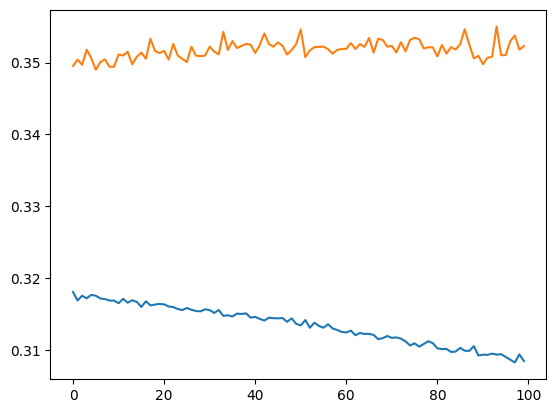

In [600]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

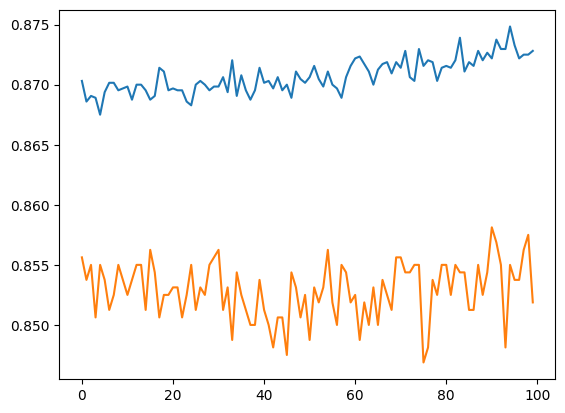

In [602]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])